<a href="https://colab.research.google.com/github/mintmaheen/Object-detection/blob/main/Object_detection_helmet_safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Feb  9 17:05:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.5/709.5 kB 10.2 MB/s eta 0:00:00


In [4]:
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6lYW9nzRClrCAI1ry4OH")
project = rf.workspace("helmet-dataset-aho0e").project("helmet-detection-lyye2")
dataset = project.version(2).download("yolov8-obb")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-Detection-2 in yolov8-obb:: 100%|██████████| 1508/1508 [00:00<00:00, 4461.69it/s]


In [7]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=600

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Helmet-Detection-2/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

In [9]:
!ls {HOME}/runs/detect/train2/

args.yaml					    PR_curve.png	train_batch431.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch432.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1707498511.d014c7a2f8af.1896.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch430.jpg


In [10]:
from IPython.display import display, Image

/content


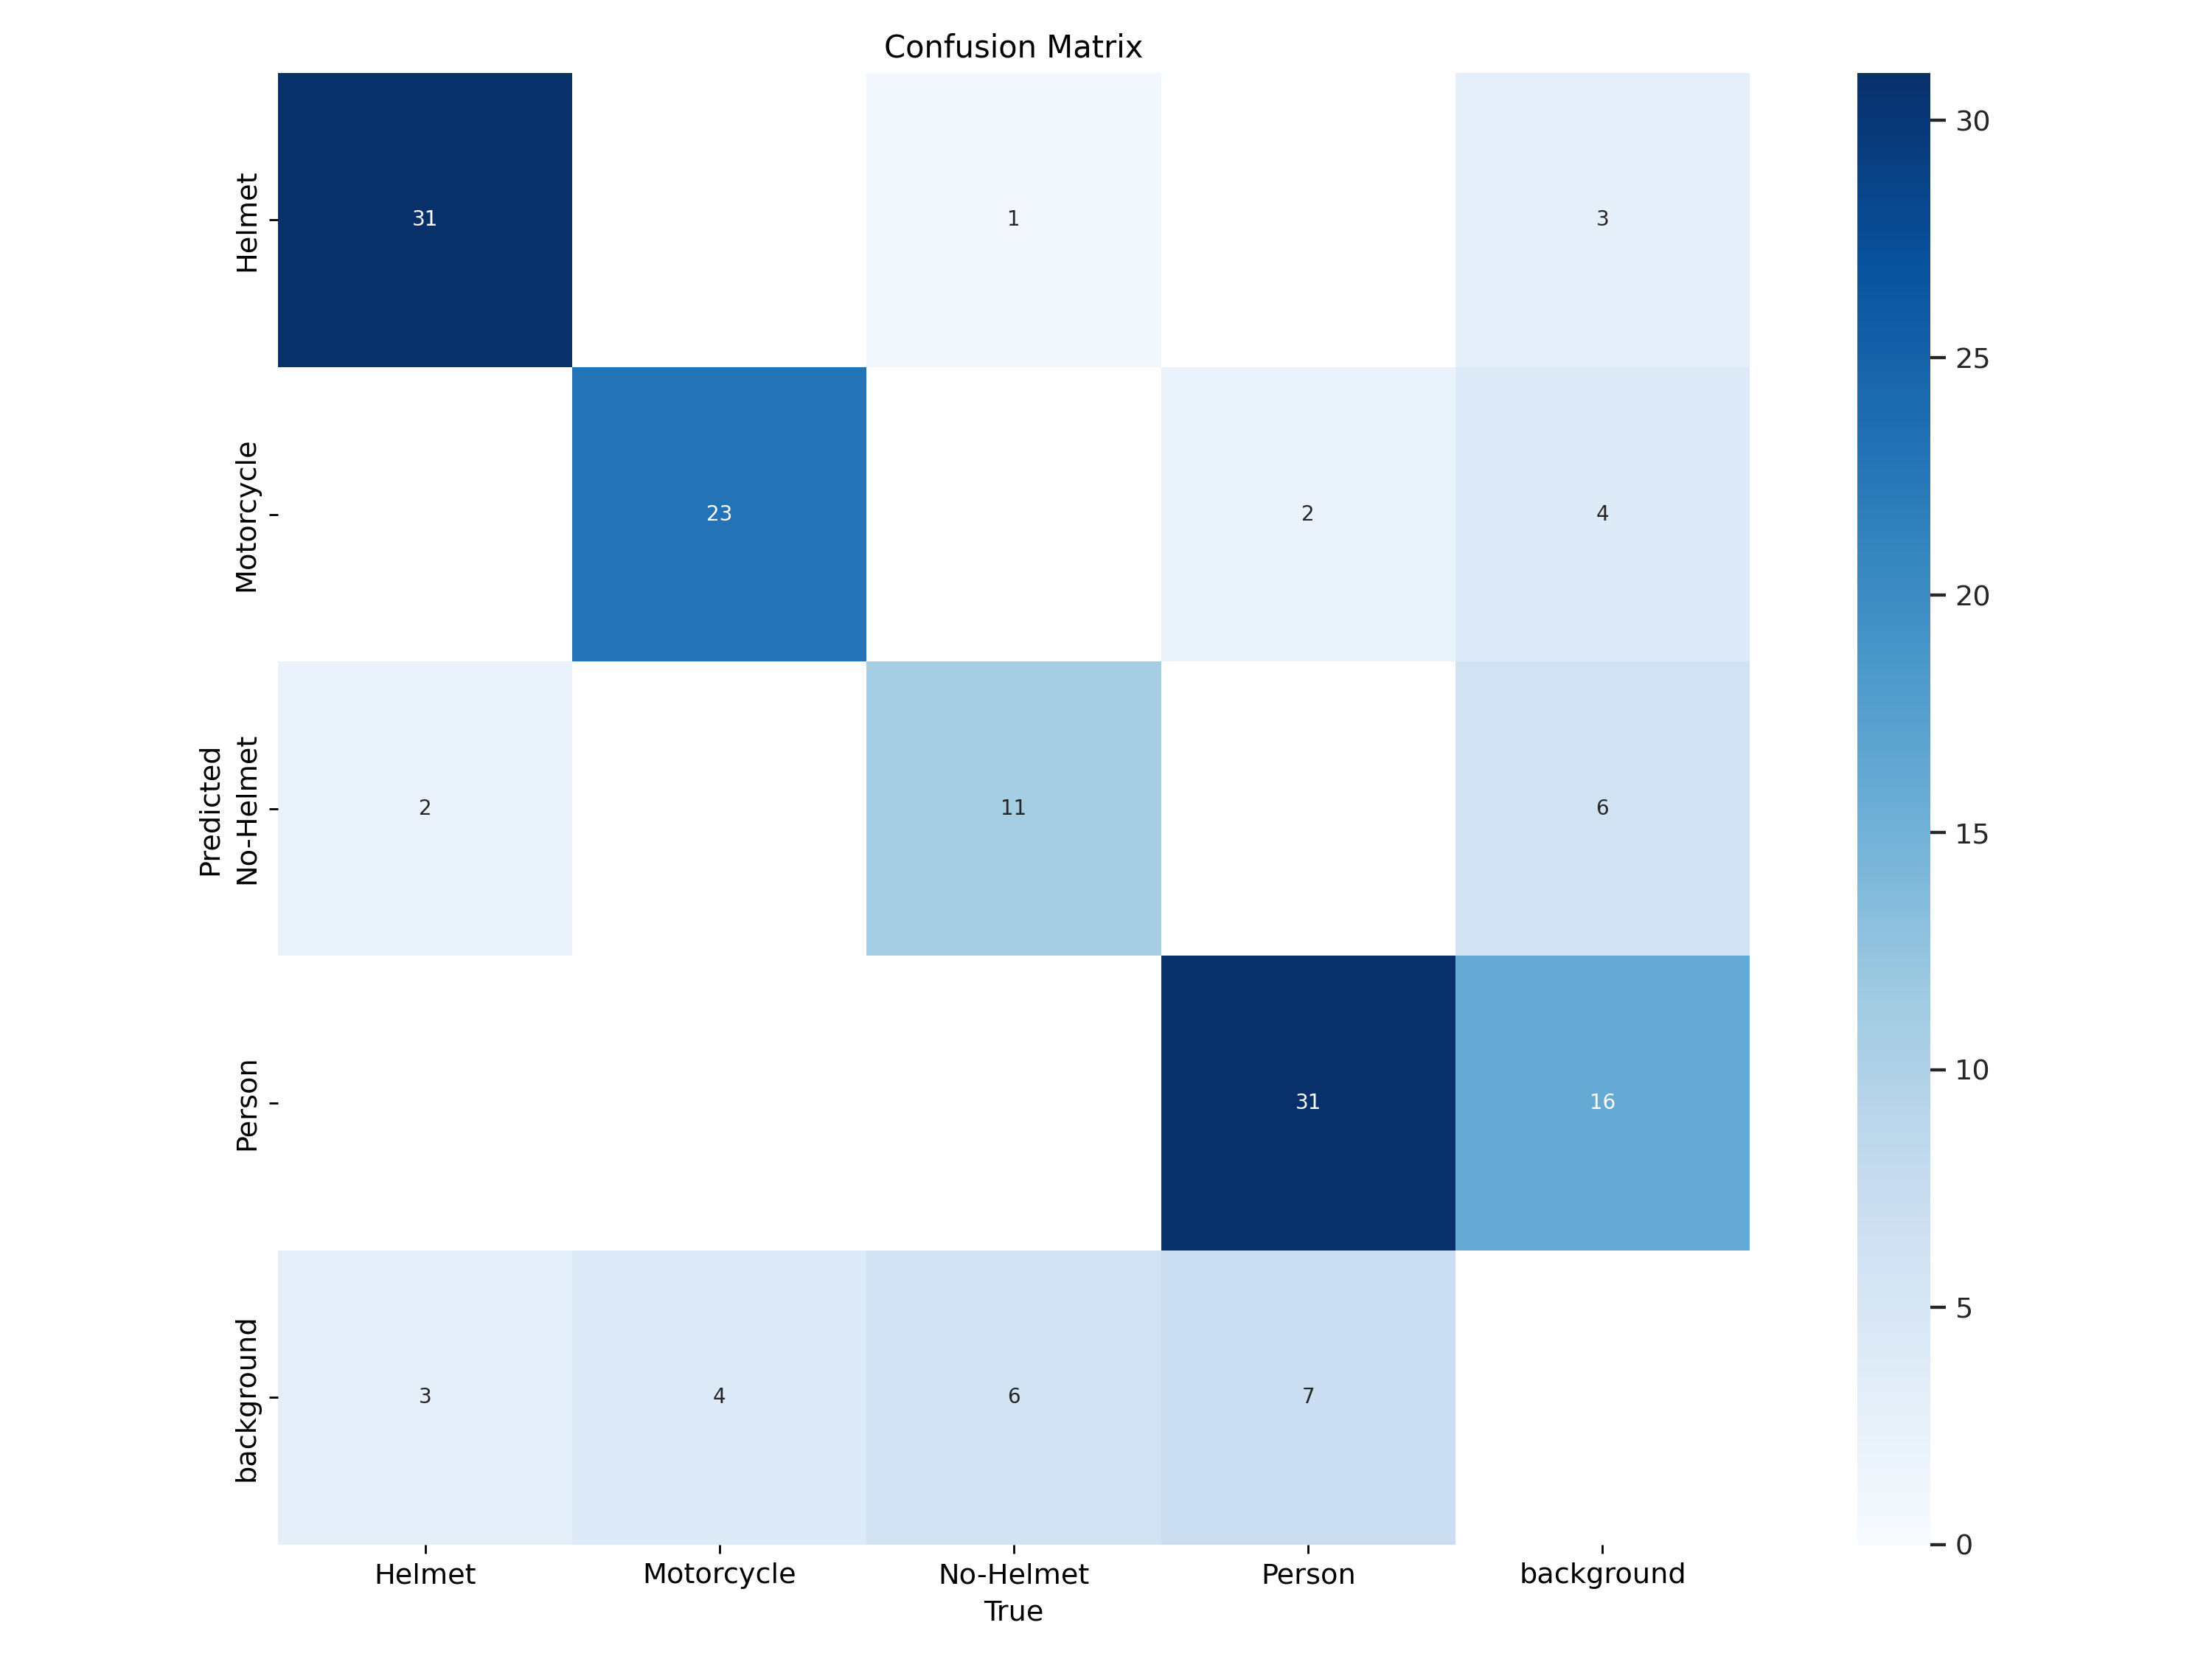

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=800)

/content


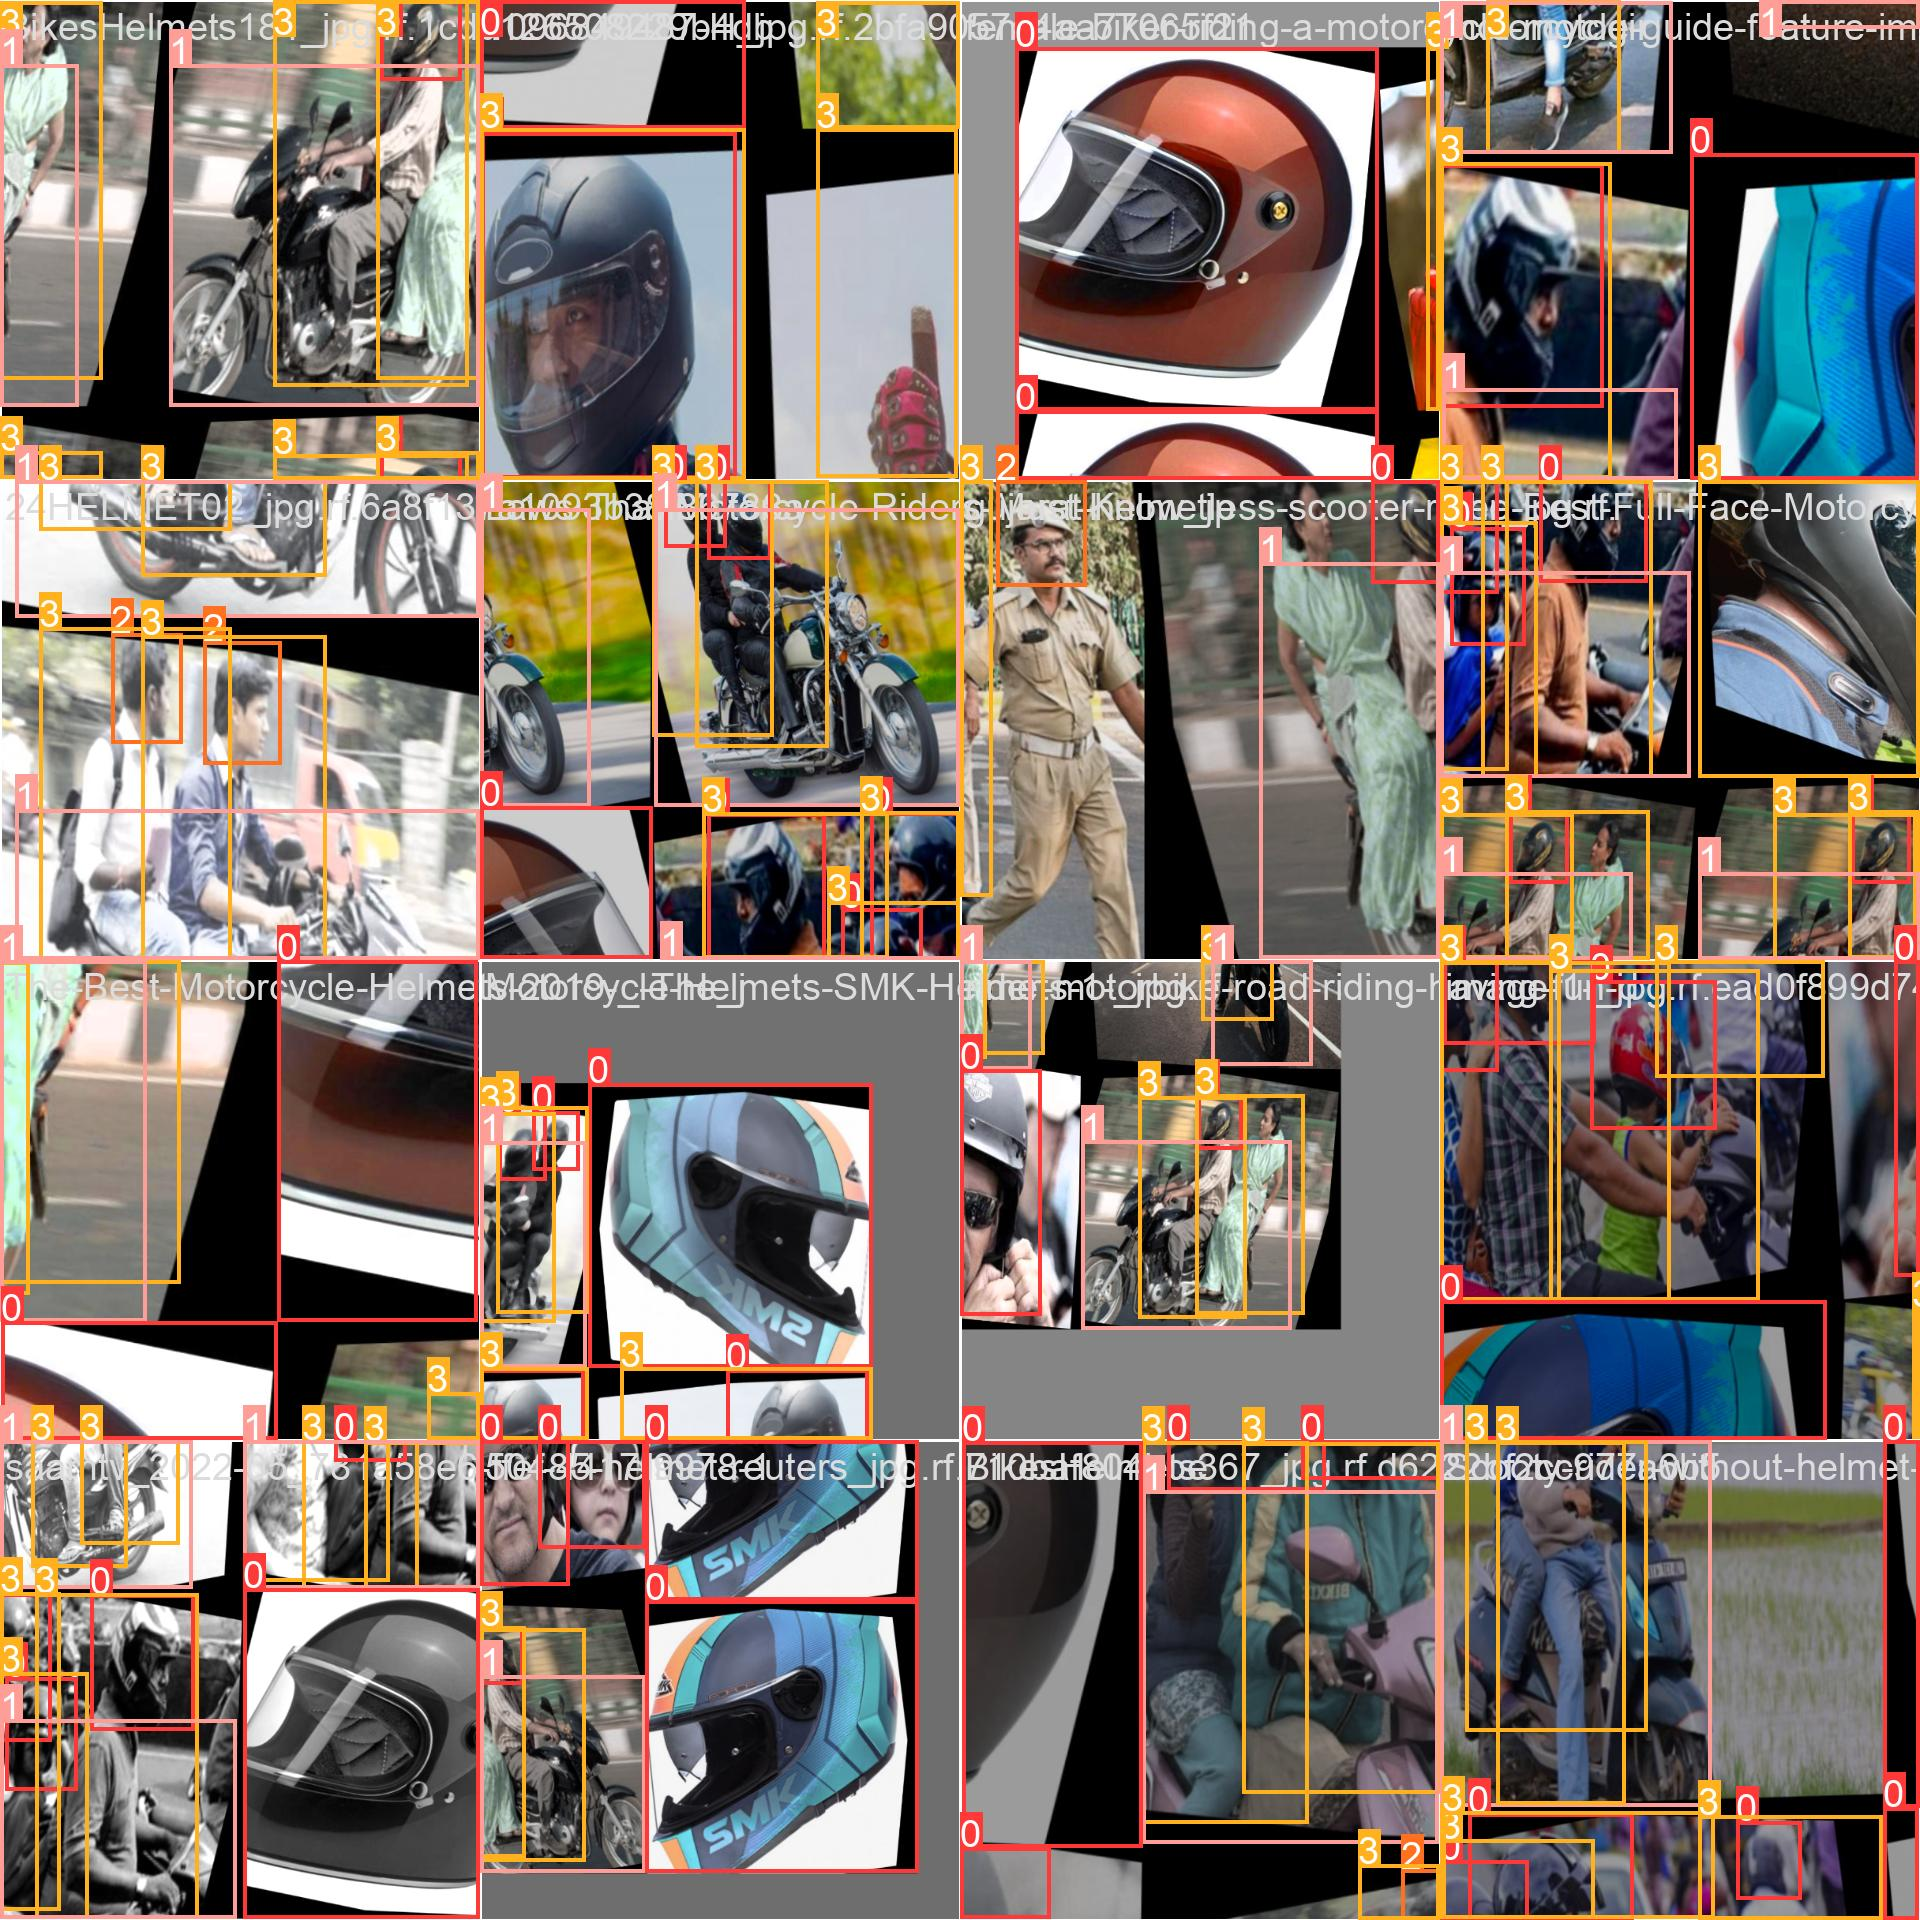

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/train_batch1.jpg', width=200)

/content


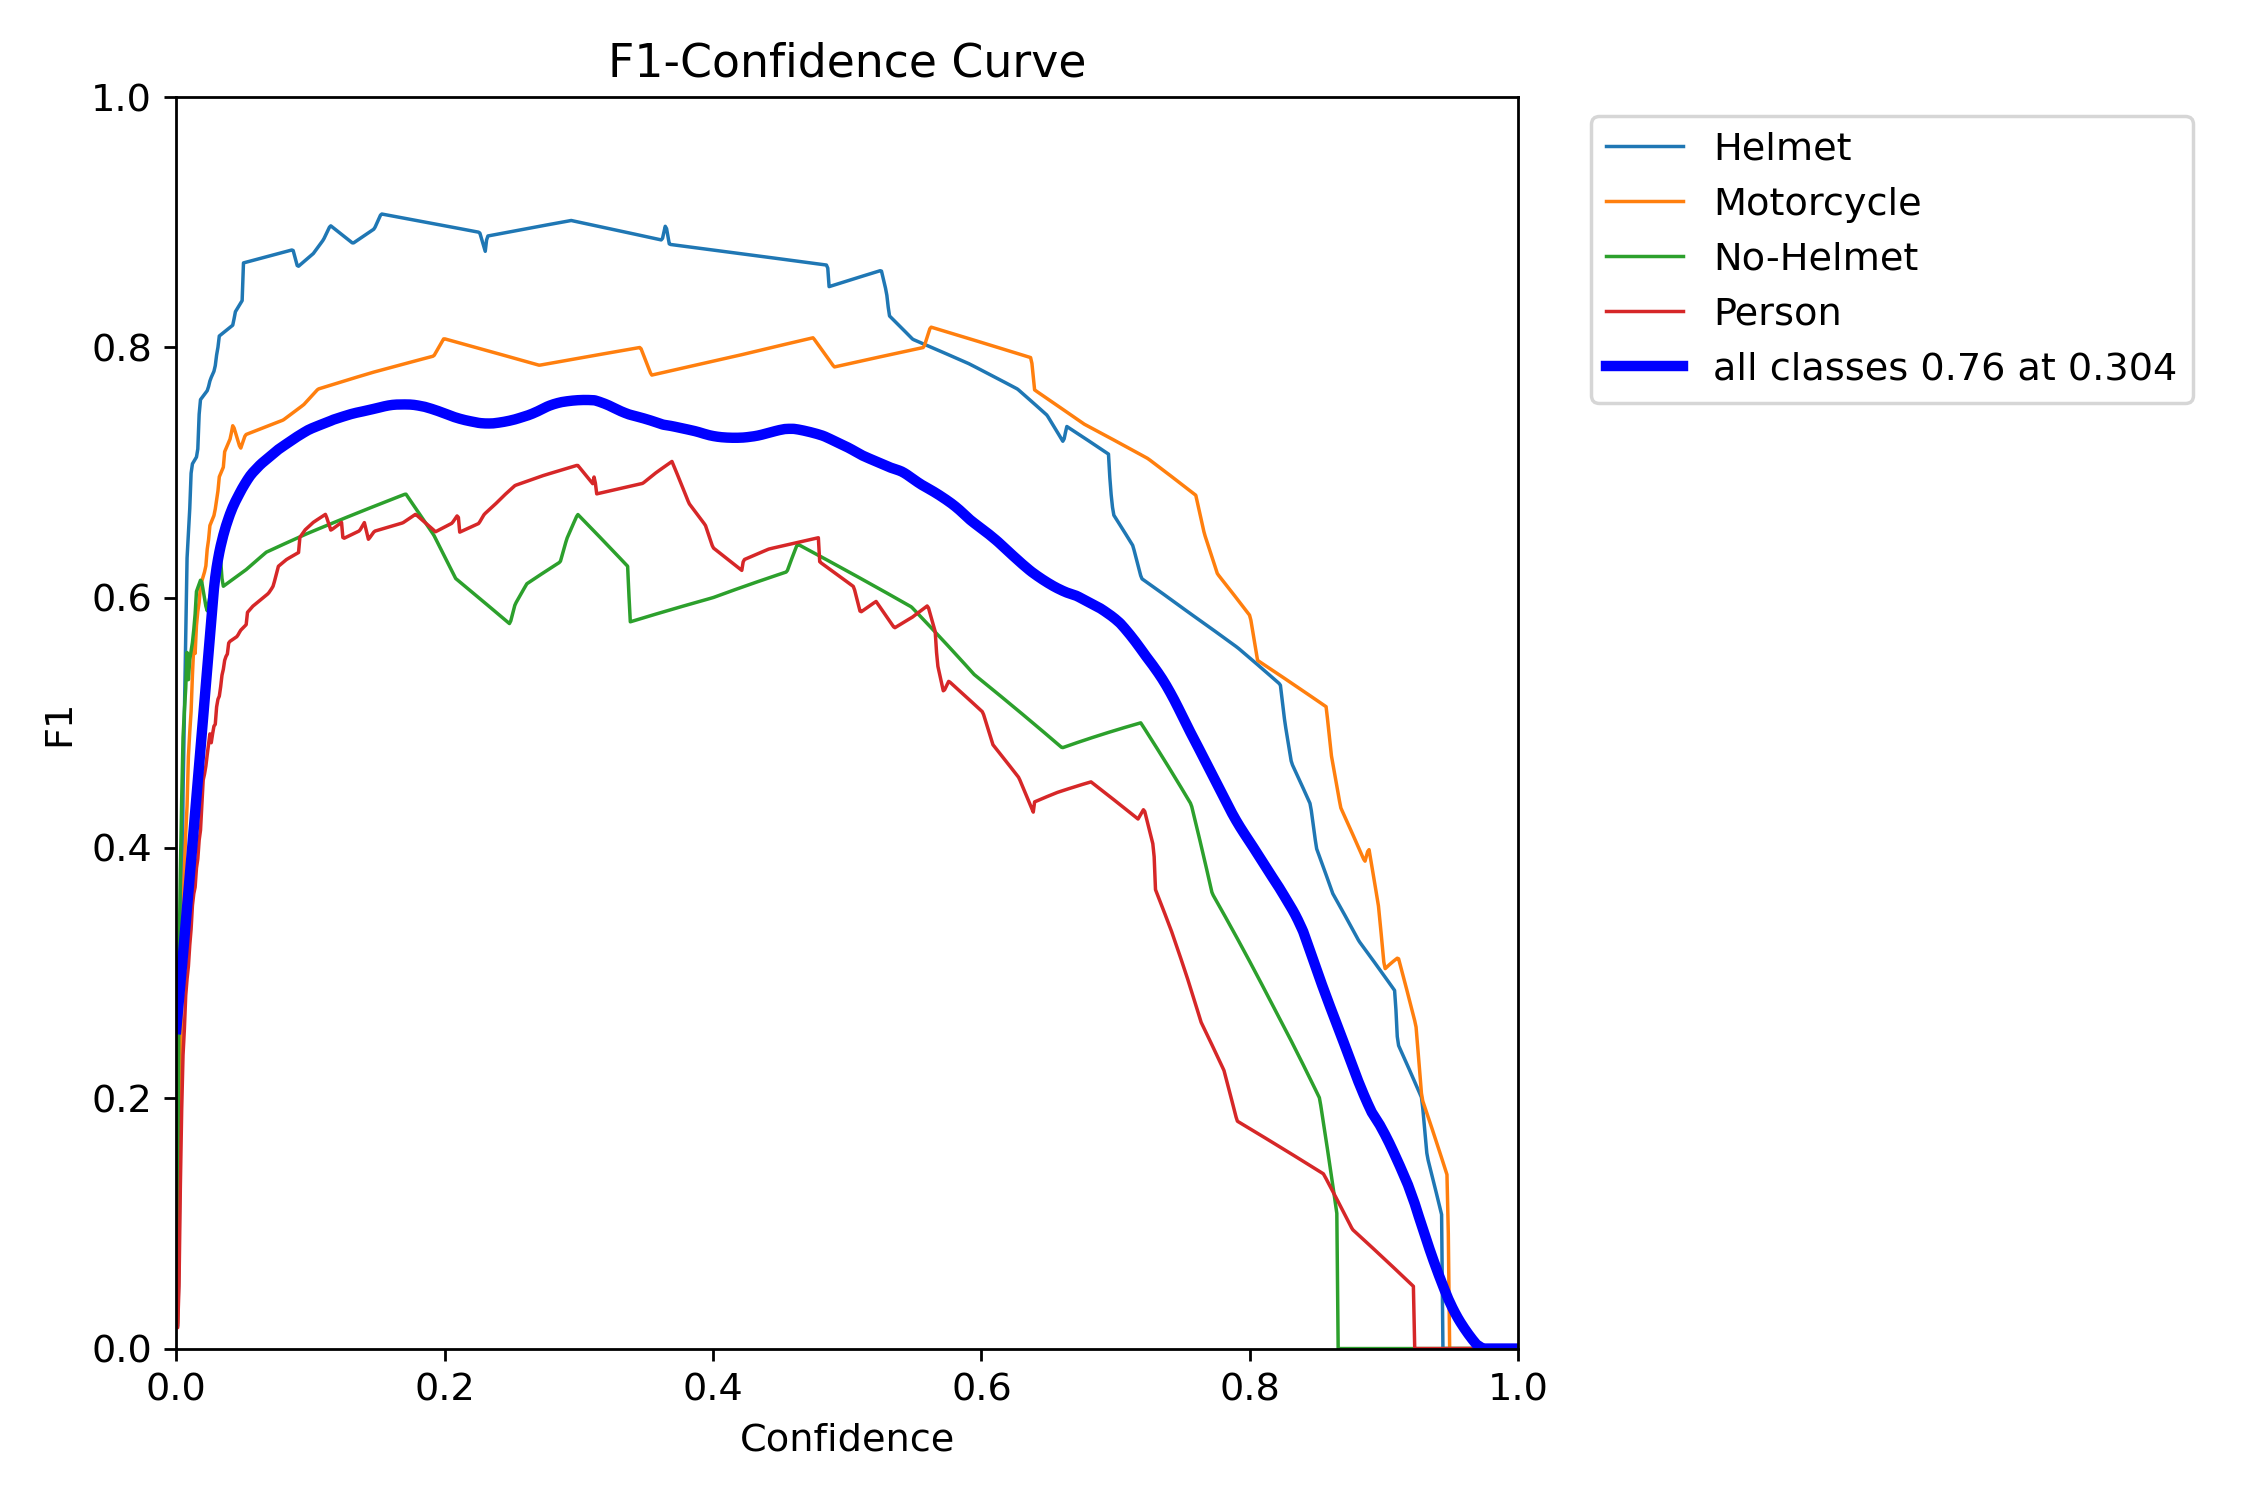

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/F1_curve.png', width=800)

In [14]:
%cd
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/root
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Helmet-Detection-2/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100% 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.08s/it]
                   all         39        121       0.77      0.764      0.819      0.423
                Helmet         39         36      0.914      0.887      0.965       0.58
            Motorcycle         39         27       0.77      0.815      0.839       0.48
             No-Helmet         39         18      0.733      0.609      0.756      0.354
                Person         39         40      0.665      0.746      0.718      0.276
Speed: 3.5ms preprocess, 28.5ms inference, 0.0ms loss, 18.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more 

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/25 /content/Helmet-Detection-2/test/images/18VZ3HELMETRULE_jpg.rf.7710883f01cf42478f7413dff9ca5262.jpg: 608x608 1 Helmet, 1 Motorcycle, 1 No-Helmet, 3 Persons, 20.7ms
image 2/25 /content/Helmet-Detection-2/test/images/2020-helmet-study-more-riders-wearing-2_jpg.rf.df81484782f98c837fbe70dba231d25b.jpg: 608x608 2 Helmets, 2 Persons, 7.3ms
image 3/25 /content/Helmet-Detection-2/test/images/5MN6NEGY2BCQVREC3BH5YGNFYE_jpg.rf.cf3092fcb762fb236d3010161e50ba5c.jpg: 608x608 2 Motorcycles, 4 No-Helmets, 5 Persons, 7.2ms
image 4/25 /content/Helmet-Detection-2/test/images/BikesHelmets180_jpg.rf.f4761d6107b5d6f1ca5cb6949b5b5a3d.jpg: 608x608 3 Motorcycles, 5 No-Helmets, 4 Persons, 7.2ms
image 5/25 /content/Helmet-Detection-2/test/images/BikesHelmets197_jpg.rf.a91778c4e1225aa360909947e6b9a57f.jpg: 608x608 1 Motorcycle, 

/content


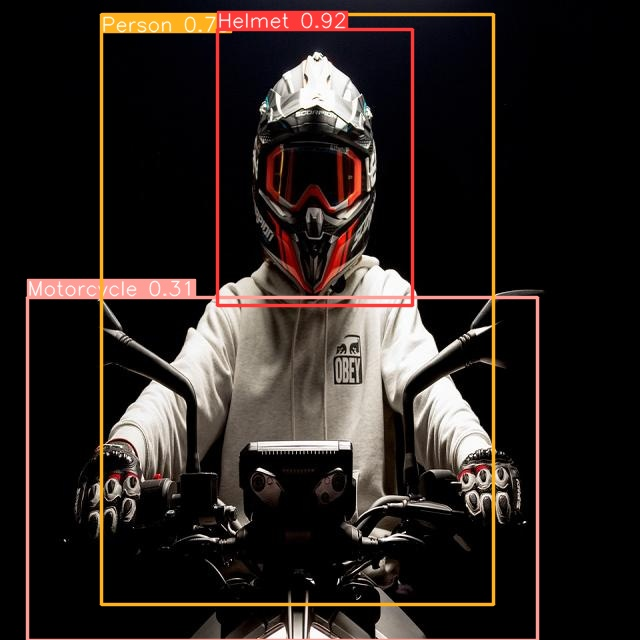

In [20]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/motorcycle-6288958_960_720_jpg.rf.47da03d87cb1c15688538f219e9d7a26.jpg', width=800)

Here is a new downloaded image on which we are gonna test the model

/content


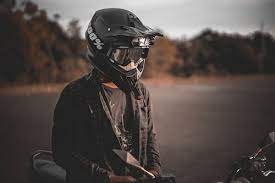

In [22]:
%cd {HOME}
Image(filename=f'/content/download.jpg', width=800)

In [23]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/download.jpg

/content
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/download.jpg: 416x608 1 Helmet, 1 Person, 95.1ms
Speed: 3.2ms preprocess, 95.1ms inference, 729.2ms postprocess per image at shape (1, 3, 416, 608)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


the results are saved in runs/detect/predict3
Now we will open that file

/content


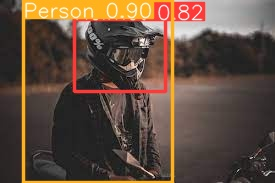

In [27]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict3/download.jpg', width= 500 )

Our model detected a person and the helmet too.